In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [146]:
dataset=pd.read_csv('height-weight-dataset.csv')

In [147]:
dataset.head()

,Weight,Height
0,28.0,121.92
1,28.1,124.46
2,28.2,127.00
3,28.3,129.54
4,28.4,132.08


In [148]:
dataset.tail()

,Weight,Height
30,94.8,198.12
31,97.5,200.66
32,99.8,203.20
33,102.5,205.00
34,104.8,208.00


In [149]:
dataset.shape

(35, 2)

In [150]:
dataset.info

<bound method DataFrame.info of     Weight  Height
0     28.0  121.92
1     28.1  124.46
2     28.2  127.00
3     28.3  129.54
4     28.4  132.08
5     28.5  134.62
6     35.2  137.16
7     37.6  139.70
8     40.0  142.24
9     42.6  144.78
10    44.9  147.32
11    47.6  149.86
12    49.9  152.40
13    52.6  154.94
14    54.9  157.48
15    57.6  160.02
16    59.9  162.56
17    62.6  165.10
18    64.8  167.64
19    67.6  170.18
20    69.8  172.72
21    72.6  175.26
22    74.8  177.80
23    77.5  180.34
24    79.8  182.88
25    82.5  185.42
26    84.8  187.96
27    87.5  190.50
28    89.8  193.04
29    92.5  195.58
30    94.8  198.12
31    97.5  200.66
32    99.8  203.20
33   102.5  205.00
34   104.8  208.00>

In [151]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  35 non-null     float64
 1   Height  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [152]:
dataset.describe()

,Weight,Height
count,35.000000,35.000000
mean,62.808571,165.070857
std,25.004992,25.979902
min,28.000000,121.920000
25%,41.300000,143.510000
50%,62.600000,165.100000
75%,83.650000,186.690000
max,104.800000,208.000000


In [153]:
#conversion to numpy array
x_train = np.array(dataset["Height"]) #feature
x_train
y_train = np.array(dataset["Weight"]) #target value
y_train

array([ 28. ,  28.1,  28.2,  28.3,  28.4,  28.5,  35.2,  37.6,  40. ,
        42.6,  44.9,  47.6,  49.9,  52.6,  54.9,  57.6,  59.9,  62.6,
        64.8,  67.6,  69.8,  72.6,  74.8,  77.5,  79.8,  82.5,  84.8,
        87.5,  89.8,  92.5,  94.8,  97.5,  99.8, 102.5, 104.8])

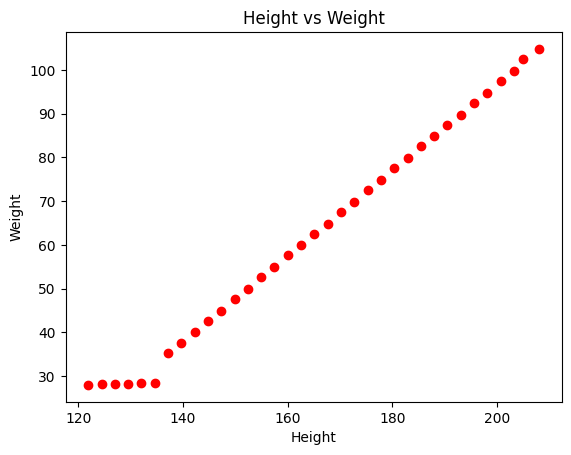

In [154]:
# Create scatter plot
plt.scatter(x_train, y_train, color='red', marker='o')

# Add title and labels
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

# Show the plot
plt.show()

In [155]:
# Remove the first six values from X_train and y_train
x_train = x_train[6:]
y_train = y_train[6:]



y_train

array([ 35.2,  37.6,  40. ,  42.6,  44.9,  47.6,  49.9,  52.6,  54.9,
        57.6,  59.9,  62.6,  64.8,  67.6,  69.8,  72.6,  74.8,  77.5,
        79.8,  82.5,  84.8,  87.5,  89.8,  92.5,  94.8,  97.5,  99.8,
       102.5, 104.8])

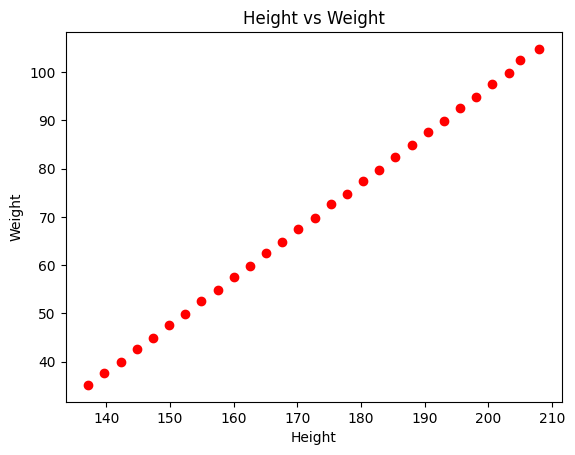

In [157]:
# Create scatter plot
plt.scatter(x_train, y_train, color='red', marker='o')

# Add title and labels
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

# Show the plot
plt.show()

In [158]:
# Define Model
def f(w, b ,x):
    return w * x + b

In [159]:
# # Define function to calculate cost
def compute_cost(x, y, w , b):
    m = x.shape[0]
    cost = np.sum(np.square(f(w, b, x) - y)) / (2*m)
    return cost

In [160]:
# Function to compute gradient
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    
    w_grad = np.sum((f(w, b, x) -y) * x) / m # calculate gradient for w
    b_grad = np.sum(f(w, b ,x) - y) / m  # calculate gradient for b
    return w_grad, b_grad


In [161]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing
         

In [195]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 2.0e-5
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 4.77e+02  dj_dw: -1.252e+04, dj_db: -6.996e+01   w:  2.505e-01, b: 1.39917e-03
Iteration 1000: Cost 7.41e+01  dj_dw: -8.458e-03, dj_db:  1.483e+00   w:  4.139e-01, b:-2.73261e-02
Iteration 2000: Cost 7.40e+01  dj_dw: -8.456e-03, dj_db:  1.482e+00   w:  4.140e-01, b:-5.69740e-02
Iteration 3000: Cost 7.40e+01  dj_dw: -8.453e-03, dj_db:  1.482e+00   w:  4.142e-01, b:-8.66130e-02
Iteration 4000: Cost 7.39e+01  dj_dw: -8.451e-03, dj_db:  1.481e+00   w:  4.144e-01, b:-1.16243e-01
Iteration 5000: Cost 7.39e+01  dj_dw: -8.448e-03, dj_db:  1.481e+00   w:  4.145e-01, b:-1.45865e-01
Iteration 6000: Cost 7.39e+01  dj_dw: -8.446e-03, dj_db:  1.480e+00   w:  4.147e-01, b:-1.75477e-01
Iteration 7000: Cost 7.38e+01  dj_dw: -8.443e-03, dj_db:  1.480e+00   w:  4.149e-01, b:-2.05081e-01
Iteration 8000: Cost 7.38e+01  dj_dw: -8.441e-03, dj_db:  1.480e+00   w:  4.150e-01, b:-2.34676e-01
Iteration 9000: Cost 7.37e+01  dj_dw: -8.438e-03, dj_db:  1.479e+00   w:  4.152e-01, b:-2.64262e-01


In [196]:
print(f"The optimal values of w and b are {w_final:.4f} and {b_final:.4f} respectively.")

The optimal values of w and b are 0.4154 and -0.2938 respectively.


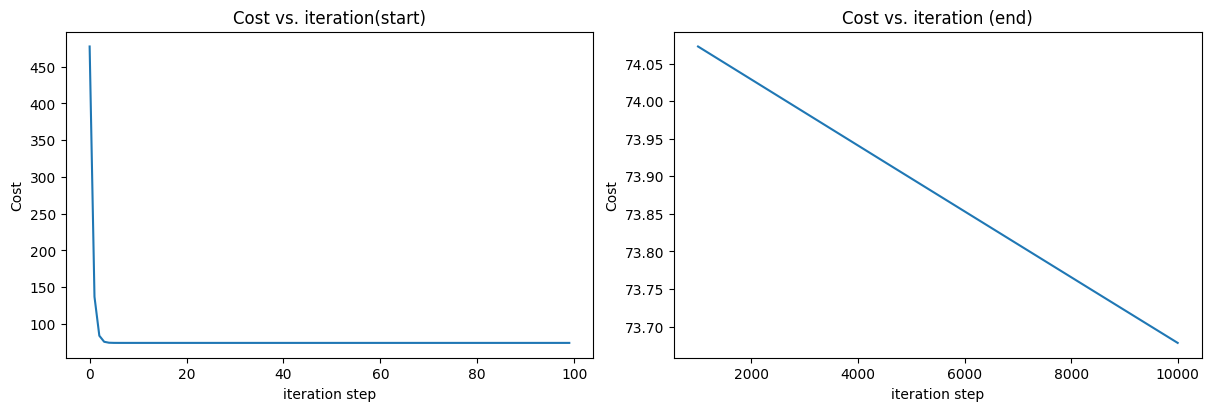

In [197]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [198]:
# Make predictions
y_pred = f(w_final, b_final, x_train)

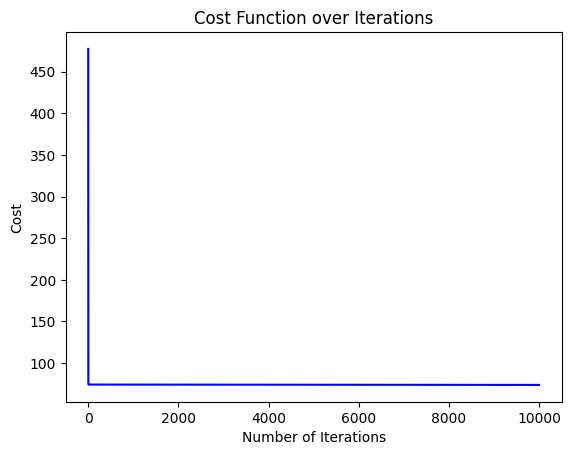

In [199]:
plt.plot(range(iterations), J_hist , 'b')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

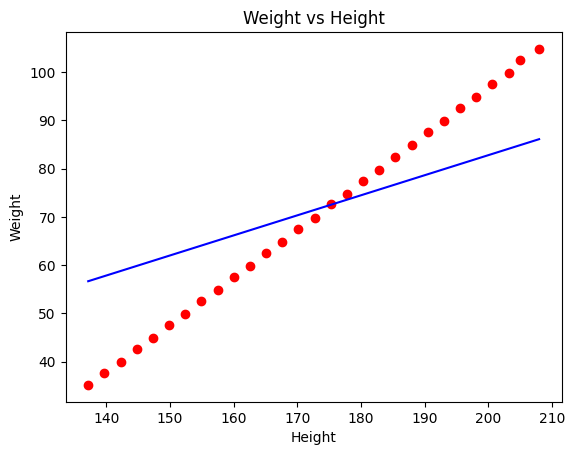

In [200]:
plt.scatter(x_train, y_train, c = "r")
plt.plot(x_train, y_pred, c = "b")
plt.title("Weight vs Height")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [194]:
# Make Prediction
height = 140

print(f"Weight corresponding to {height} height is {f(w_final, b_final, height):.2f} dollars")


Weight corresponding to 140 height is 57.91 dollars
